## Assignment for Week 7 - Performance Evaluations

### Project:
#### Performance Evaluations: ROC and PR Curves

Bank Marketing data:  https://archive.ics.uci.edu/ml/datasets/bank+marketing

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

From the given data set, complete the following:
  * Try 3 different types of models to make classification predictions on the bank marketing dataset 
  * Calculate the AUC score as a comparison, and at least 2 other metrics (ie: accuracy, F1 score, precision, recall, etc) 
      - Compare the models’ performance on the same train/test splits 
  * Plot the ROC curve from the best model, choose what you think the best threshold value is for making predictions

### Deliverables:

Upload your notebook's .ipynb file.
   
**Important:** Make sure your provide complete and thorough explanations for all of your analysis. You need to defend your thought processes and reasoning.

In [125]:
#Importing necessary packages
import os
os.chdir(r"C:\Users\Collin\Documents\collins documents\Regis Homework\Machine Learning wk 7")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #visualisation
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [126]:
import seaborn as sns #visualisation

In [127]:
from sklearn.preprocessing import OneHotEncoder

In [128]:
#Reading in data with semi colon delimiter
df =  pd.read_csv('bank-full.csv', sep=';')

In [130]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [131]:
#Changing outcome variable to 0's and 1's to be able to fit in model
df = df.replace({'y': {'yes': 1, 'no': 0}})

In [132]:
#Checking dataset for datatypes and number of observations for each variable 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [133]:
#Checking variable ranges
df.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


Text(0, 0.5, 'Frequncy')

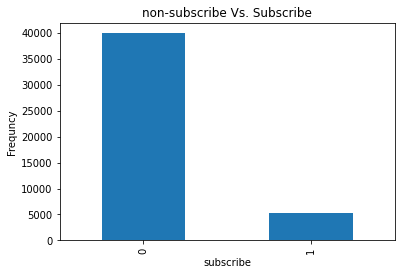

In [134]:
#Looking at distribution for outcome variable
count_classes = pd.value_counts(df['y'], sort = False)
count_classes.plot (kind='bar')
plt.title ("non-subscribe Vs. Subscribe")
plt.xlabel ("subscribe")
plt.ylabel ("Frequncy")

In [135]:
#Getting exact counts
count_subscribed = df.loc[df['y'] == 1]
print(len(count_subscribed))
count_nonsubscribed = df.loc[df['y'] == 0]
print(len(count_nonsubscribed))

5289
39922


In [136]:
#Separating data into two different results to balance the dataset
subscribe_indices = np.array (df[df.y==1].index)
nonsubscribe = np.array (df[df.y==0].index)

In [137]:
#sources for undersampling decision
#https://www.kaggle.com/jdelamorena/recall-97-by-using-undersampling-neural-network
#https://www.mastersindatascience.org/learning/statistics-data-science/undersampling/
#randomly selecting observations to keep for non-fradulent transactions to balance out the dataset
#Using undersampling to take observations randomly to even out data
random_nonsubscribe_indices = np.random.choice (nonsubscribe, 5289, replace = False )

In [138]:
under_sample_indices = np.concatenate ([subscribe_indices, random_nonsubscribe_indices])

In [139]:
under_sample_data = df.iloc[under_sample_indices,:]

In [140]:
df = under_sample_data

In [141]:
quant_list = list(df.select_dtypes(include = [np.int64]).columns)

In [142]:
category_list=list(df.select_dtypes(include = [object]).columns)

In [143]:
df_quant = df.drop(category_list, axis=1)

In [144]:
#Getting the data to quantitative data types to use in models
category_df= df.drop(quant_list, axis = 1)
category_dummies = pd.get_dummies(category_df)
final_dataframe = pd.concat([df_quant, category_dummies], axis = 1, join = 'outer')
df = final_dataframe
df.dtypes


age                    int64
balance                int64
day                    int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
y                      int64
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
marital_divorced       uint8
marital_married        uint8
marital_single         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
default_no             uint8
default_yes            uint8
housing_no             uint8
housing_yes            uint8
loan_no                uint8
loan_yes               uint8
contact_cellular       uint8
contact_teleph

In [145]:
#Looking at the correlation with each variable to the outcome variable
plt.figure(figsize=(20,10))
corr= df.corr()
corr['y'].sort_values(ascending = False)

y                      1.000000
duration               0.448491
poutcome_success       0.289954
contact_cellular       0.226890
housing_no             0.209293
pdays                  0.151412
previous               0.147328
month_oct              0.135124
month_mar              0.128830
month_sep              0.127794
loan_no                0.123417
education_tertiary     0.098434
job_student            0.096718
job_retired            0.096181
marital_single         0.093798
month_apr              0.092233
balance                0.076016
month_dec              0.075024
month_feb              0.049817
poutcome_other         0.047353
job_management         0.042811
default_no             0.038798
age                    0.032242
job_unemployed         0.024049
education_unknown      0.016550
job_admin.             0.014538
contact_telephone      0.014445
poutcome_failure       0.013763
job_unknown            0.010070
marital_divorced       0.008299
job_technician        -0.008723
month_ja

<Figure size 1440x720 with 0 Axes>

In [146]:
#Getting rid of least correlating variables to the outcome variable
df = df.drop(['month_feb','job_management','poutcome_other','age','default_no','job_unemployed','contact_telephone','education_unknown','poutcome_failure','job_admin.','marital_divorced'], axis =1)       

In [147]:
df = df.drop(['job_self-employed','job_unknown','month_aug','month_jan','job_technician','month_nov','job_housemaid','month_jun','job_entrepreneur','default_yes','job_services','day','month_jul','education_secondary','education_primary'], axis=1)


In [148]:
df.head()

,balance,duration,campaign,pdays,previous,y,job_blue-collar,job_retired,job_student,marital_married,...,contact_cellular,contact_unknown,month_apr,month_dec,month_mar,month_may,month_oct,month_sep,poutcome_success,poutcome_unknown
83,2343,1042,1,-1,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
86,45,1467,1,-1,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
87,1270,1389,1,-1,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
129,2476,579,1,-1,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
168,184,673,2,-1,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1


<AxesSubplot:>

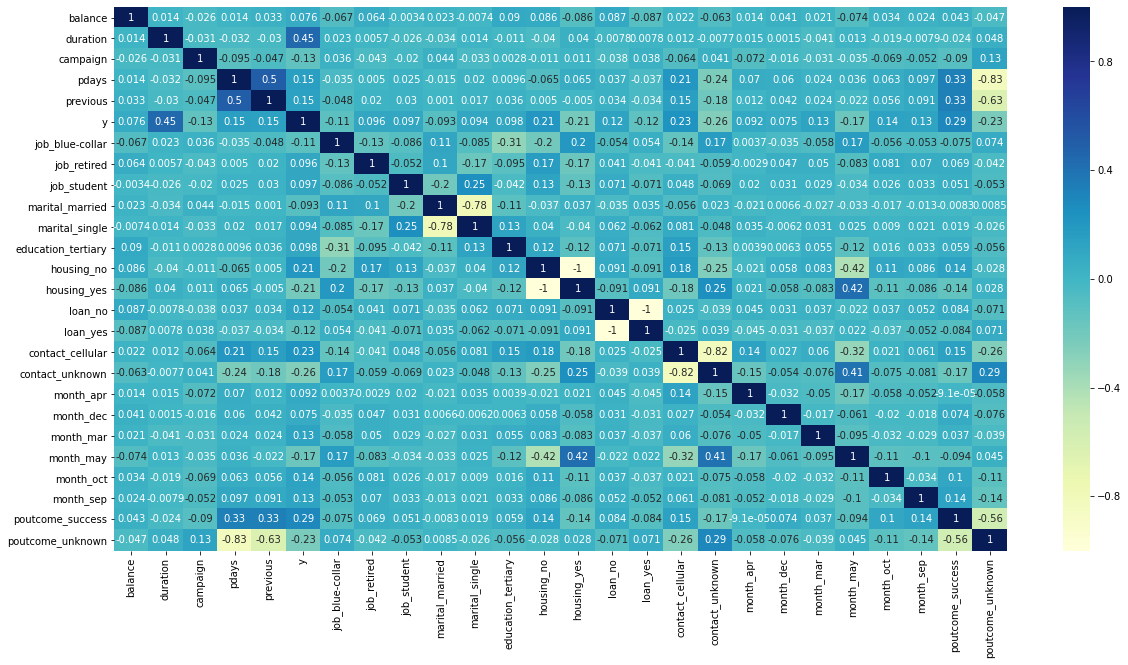

In [149]:
#Looking at correlation matrix for colinear variables
plt.figure(figsize=(20,10))
corr= df.corr()
sns.heatmap(corr,cmap="YlGnBu",annot=True)

In [185]:
#Getting rid of variables that have the converse dummy variable 
df = df.drop(['housing_yes','loan_yes'], axis =1)

In [79]:
from sklearn.preprocessing import StandardScaler

In [150]:
scaler = StandardScaler()

In [151]:
#Splitting dataset
cols= df.columns

prediction_col = 'y'
feature_cols = [c for c in cols if c != 'y']

x = df[feature_cols].values
y = df[prediction_col].values

#split the dataset into the train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=41)

In [152]:
#Standardizing data
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

In [177]:
#Running Logistic regression 
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

#gathering the predictions
preds = logistic_model.predict(x_test)

In [178]:
#Checking accuracy
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,preds))

0.8226212980466289


In [179]:
#Checking f1 score
from sklearn.metrics import classification_report

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1589
           1       0.84      0.80      0.82      1585

    accuracy                           0.82      3174
   macro avg       0.82      0.82      0.82      3174
weighted avg       0.82      0.82      0.82      3174



In [156]:
#importing packages for ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [157]:
#Checking area under curve
auc = roc_auc_score(y_test, preds)
print('AUC: %.3f' % auc)

AUC: 0.823


In [158]:
#Running random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
rf.fit(x_train, y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [159]:
#Predicting using random forest
predictions = rf.predict(x_test)

In [160]:
#Checking accuracy of predictions
print(accuracy_score(y_test,predictions))

0.8207309388783869


In [161]:
#Looking at f1 score for RF
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1589
           1       0.82      0.82      0.82      1585

    accuracy                           0.82      3174
   macro avg       0.82      0.82      0.82      3174
weighted avg       0.82      0.82      0.82      3174



In [168]:
#Checking AUC for RF
auc2 = roc_auc_score(y_test, predictions)
print('AUC: %.3f' % auc2)

AUC: 0.821


In [166]:
#Using SVM for classification
from sklearn import svm
model = svm.SVC(kernel='linear')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [167]:
#Checking accuracy for SVM
print(accuracy_score(y_test,y_pred))

0.8223062381852552


In [176]:
#Looking at F1 Score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1589
           1       0.83      0.81      0.82      1585

    accuracy                           0.82      3174
   macro avg       0.82      0.82      0.82      3174
weighted avg       0.82      0.82      0.82      3174



In [169]:
#Looking at area under curve
auc3 = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc3)

AUC: 0.822


In [182]:
#Setting up ROC curve for logistic regression
from sklearn.metrics import roc_curve
y_score1 = logistic_model.predict_proba(x_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
   

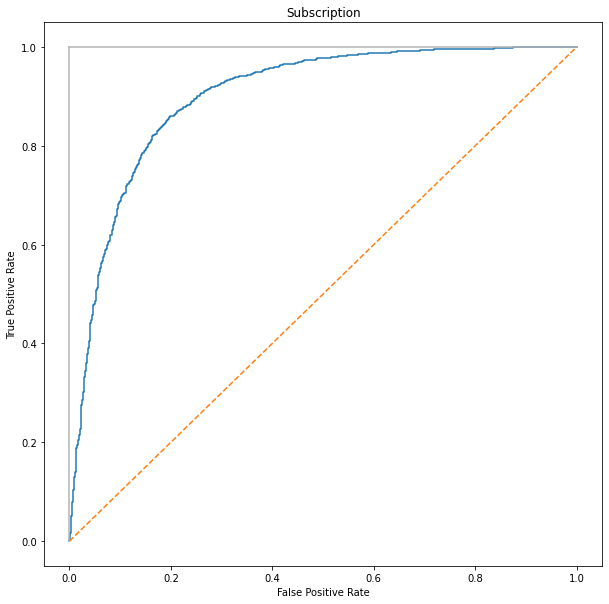

In [184]:
plt.subplots(1, figsize=(10,10))
plt.title('Subscription')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [189]:
#Using gmeans for finding the optimum threshold
#https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/
from numpy import sqrt
gmeans = sqrt(true_positive_rate1 * (1-false_positive_rate1))
from numpy import argmax
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (threshold1[ix], gmeans[ix]))

Best Threshold=0.409826, G-Mean=0.830


Analysis:
After going through the dataset, looking at the data there was a large imbalance in the outcome 0 over the outcome of 1 for subscribing.  I started by balancing the data using undersampling and getting dummy variables for the categorical data and to make the data ready for running models.  The three models chosen for classification were Logisitc Regression, SVM, and Random Forest.  The models all performed very similar in each of the different performance metrics.  The metrics used were accuracy, F1 score, and AUC.  The logistic regression performed slightly better with an AUC of 82.66.  The reason that the accuracy and F1 score were similar to the AUC appears to be from undersampling causing the dataset to be balanced as well as the predictions. To find the best threshold I used the geometric mean which takes the squareroot of the sensitivy multiplied by specificity which are the performance for type1 and type 2 error.  This threshold method is good for finding the optimum balance between the two.  The optimum threshold was .409